In [36]:
import funcions_modelitzacio #sklearn i pandas s'importaran també
import funcions_explainability
import matplotlib

c:\Users\mpuig\Documents\Uni\Datathon25\Datathon-Schneider-Electric\.pixi\envs\default\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


% d'Exits amb tots els atributs = 0.832497678737233


100%|===================| 50223/50258 [14:20<00:00]        

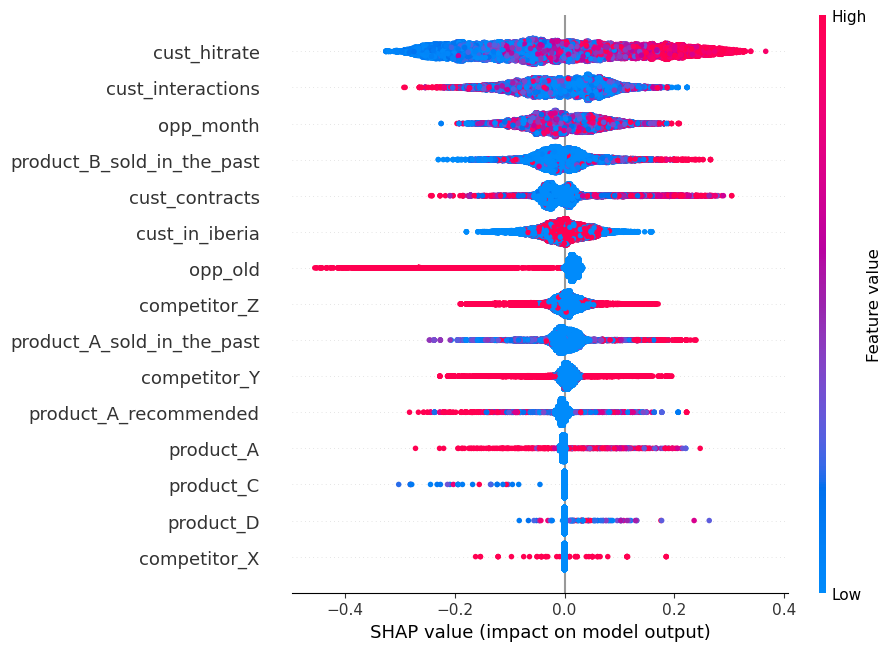

In [37]:
dades:funcions_modelitzacio.pd.DataFrame= funcions_modelitzacio.pd.read_csv("dataset.csv")
x_train, x_test, y_train, y_test = funcions_modelitzacio.split_variables_and_answer(1,15,16,0.7,dades)
model,performance_score = funcions_modelitzacio.build_model(15,x_train,y_train,x_test,y_test)
print(f"% d'Exits amb tots els atributs =", performance_score)
tree_explainer:funcions_explainability.shap.TreeExplainer = funcions_explainability.create_tree_model_explainer(model,x_train)
shap_values:funcions_explainability.shap.Explanation = funcions_explainability.get_shap_values(tree_explainer,x_train)
funcions_explainability.plot_beeswarm(shap_values)

Aquest gràfic anomenat "beeswarm plot", ens mostra la importància de cada variable en el resultat de la venta i de quina manera hi ha contribuit. Els colors vermells indiquen valors alts de la variable mentre que els blaus indiquen valors petits, i la posició dels punts ens indica com ha contribuït a la predicció. Per exemple, un punt vermell a l'alçada de +0.2 ens indicaria que un valor alt d'aquella variable ha contribuït a que la predicció sigui 1 en aquella instància. En canvi, un punt blau a l'alçada de -0.4 ens diu que un valor baix d'aquella variable a contribuït molt a que la predicció sigui 0 en aquella instància. 

Al tenir molts punts podem observar la distribució d'aquests i veure com contribueix cada variable en les prediccions generals. En el gràfic conjunt, una major quantitat de punts en un atribut ens diu que aquest s'ha fet servir moltes vegades per fer la predicció, és a dir, que té un pes molt gran a l'hora de fer-la.

En aquest cas, observem varis factors que afecten clarament a la nostra predicció:

- *cust_hitrate*:
    Aquesta és la variable amb més punts, clarament el model pren moltes decisions en funció d'aquesta variable. Observant el gràfic, veiem fàcilment que valors alts de l'atribut contribueixen a predir 1 mentre que valors baixos contribueixen a predir 0. Per tant, podem deduïr que és més fàcil aconseguir una venda amb un client a qui has aconseguit vendre abans amb èxit, mentre que si en el passat no s'ha aconseguit vendre-li disminueix la probabilitat d'aconseguir la venda.

- *cust_interactions*:
    En aquesta variable observem que els punts estan més repartits, per tant extreure conclusions clares és difícil. Tot i així, podem veure que hi ha una tendència de punts vermells per sota de zero i de punts blaus per sobre. Això ens indica que un nombre alt d'interaccions prèvies amb el mateix client tendeix a disminuir la probabilitat de que aquest compri, mentre que clients amb qui no s'ha interactuat o s'ha interactuat poc tendeixen més a comprar.

- *opp_month*:
    En el gràfic podem veure que opp_month s'ha fet servir per prendre moltes decisions, però no podem extreure una conclusió clara amb aquest gràfic sobre si afavoreix o no la venta, ja que els seus punts estan molt barrejats.

- *product_B_sold_in_the_past*:
    Observant el gràfic, veiem que els valors alts d'aquesta variable afavoreixen la probabilitat de venta mentre que els baixos, malgrat tenir molta importància en les prediccions, afecten neutral o negativament sobre la predicció. Per tant, podem dir que com més producte B s'ha venut en el passat, més probabilitat d'assolir la venda hi ha.

- *cust_in_iberia*:
    Mentre que s'ha fet servir per a moltes decisions, aquesta variable no té un impacte massa gran en les prediccions, ja que quan pren valors alts és majoritariament neutral i quan pren valors baixos afecta tant positivament com negativa. Per tant, sense tenir més dades, aquesta variable no afecta gaire.

- *opp_old*:
    Aquesta variable també destaca molt, ja que veiem molt ràpidament que quan pren valors alts, la probabilitat d'assolir la venta disminueix dràsticament, mentre que per valors baixos la probabilitat no augmenta gaire. Així doncs, podem dir que com més temps porta disponible la oportunitat de la venda, menys probabilitat hi ha d'assolir-la, per tant, ens beneficia tancar les vendes ràpidament.

- *Competitors (X, Y, Z)*:
    Tot i que tenen diferents importàncies a l'hora de prendre la decisió (amb el competidor Z sent el més important), els seus punts es comporten de manera similar: Influeixen molt poc en la predicció, centrant-se molt amb el 0.

- *Producte A*:
    Els atributs del producte A no té tanta importància com els 5 primers, però per casos concrets dona resultats interessants:
    - *product_A_sold_in_the_past*:
        Similarment al producte B, els seus valors alts augmenten la probabilitat de la venta, mentre que els baixos son neutrals o negatius.
    - *product_A_recommended*:
        Observant el gràfic, veiem que els valors alts afecten negativament a la venta mentre que els baixos afecten neutralment o positiva. Per tant, que el client rebi recomanacions del producte impacta negativament en la seva predisposició a comprar-lo.
    - *product_A*:
        Pràcticament no té efecte, però es pot observar que els valors més alts tenen tendència a afectar de manera negativa a la venta.

- *Altres productes*:
    Els productes C i D tenen molt poca importància a l'hora de fer cap mena de predicció.


**Altres gràfics rellevants:**

Per poder maximitzar les probabilitats de venda, hem volgut veure com es comportava en el pitjor dels casos per veure quines variables afecten més en condicions adverses:

 95%|=================== | 3522/3698 [00:15<00:00]       

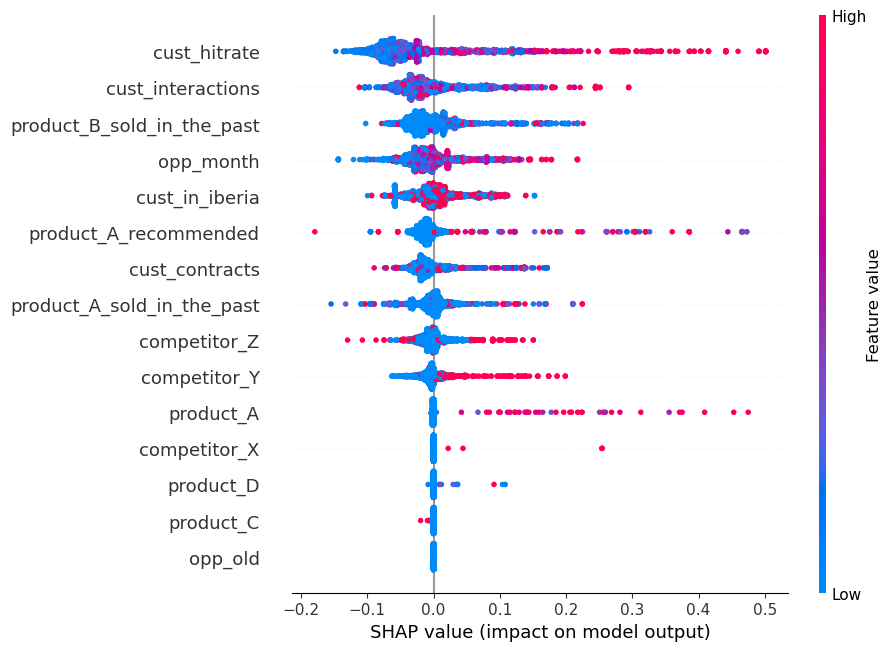

In [38]:
x_old_train, x_old_test, y_old_train, y_old_test = funcions_modelitzacio.split_variables_and_answer_with_fixed_attribute_value(1,16,"opp_old",0.85,0.7,"dataset.csv")
old_model,old_performance_score = funcions_modelitzacio.build_model(15,x_old_train,y_old_train,x_old_test,y_old_test)
old_tree_explainer:funcions_explainability.shap.TreeExplainer = funcions_explainability.create_tree_model_explainer(old_model,x_old_train)
shap_values_old:funcions_explainability.shap.Explanation = funcions_explainability.get_shap_values(old_tree_explainer,x_old_train)
funcions_explainability.plot_beeswarm(shap_values_old)

En aquest segon gràfic fixem la variable independent opp_old al percentil 0.85 dels valors que pren, ja que amb aquests valors la probabilitat de fer la venta disminueix notablement.
Ambs valors alts de opp_old es poden presenciar certs canvis:

- cust_interactions: 
    Quantes menys interaccions menys es ven

- cust_in_iberia: 
    Observem una major importància d'aquesta variable i veiem que els clients nacionals compren més.

- Producte A:
    Observem que recomanar-lo i augmentar la quantitat que es vol vendre augmenta la probabilitat de venda en lloc de disminuir-la, com passava en el cas base.

- competitor_z: La presència de Z en el mercat influeix menys 

- competitor_y: La presència de Y en el mercat sembla que no canvia respecte al cas general

100%|===================| 42623/42712 [06:40<00:00]        

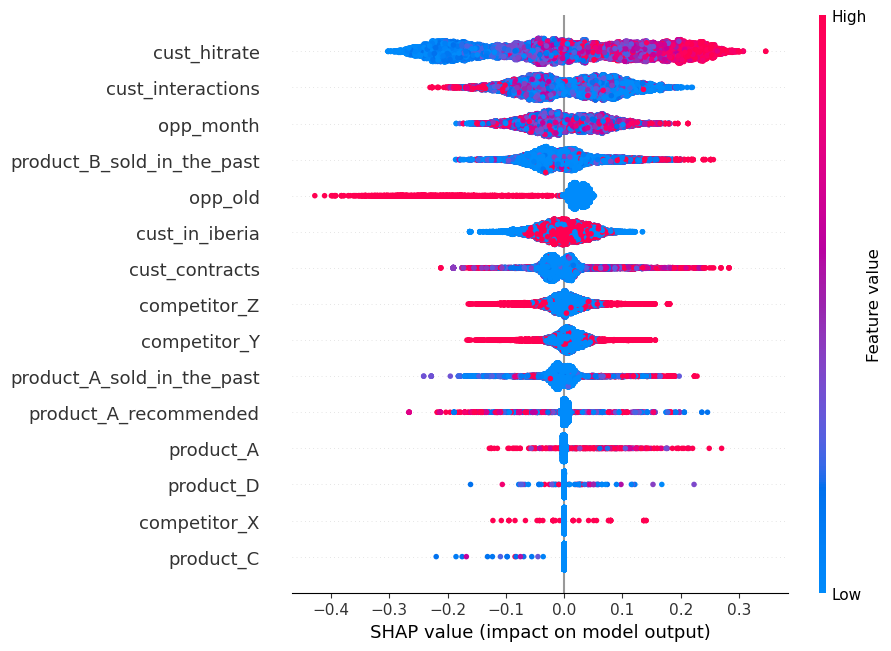

In [39]:
x_low_train, x_low_test, y_low_train, y_low_test = funcions_modelitzacio.split_variables_and_answer_with_fixed_attribute_value(1,16,"cust_hitrate",0.15,0.7,"dataset.csv")
model_low,low_performance_score = funcions_modelitzacio.build_model(15,x_low_train,y_low_train,x_low_test,y_low_test)
low_tree_explainer:funcions_explainability.shap.TreeExplainer = funcions_explainability.create_tree_model_explainer(model_low,x_low_train)
shap_values_low:funcions_explainability.shap.Explanation = funcions_explainability.get_shap_values(low_tree_explainer,x_low_train)
funcions_explainability.plot_beeswarm(shap_values_low)

En aquest plot fixem el valor del hit_rate a baix, és a dir, intentem captar clients que ens han rebutjat en el passat, veiem clarament que el valor més important és el més en el que fem la oferta, amb els darrers mesos de l'any augmentant la probabilitat de fer la venta notablement. També veiem que en aquest cas la presència del competidor Y ens afecta molt negativament comparativament amb altres casos

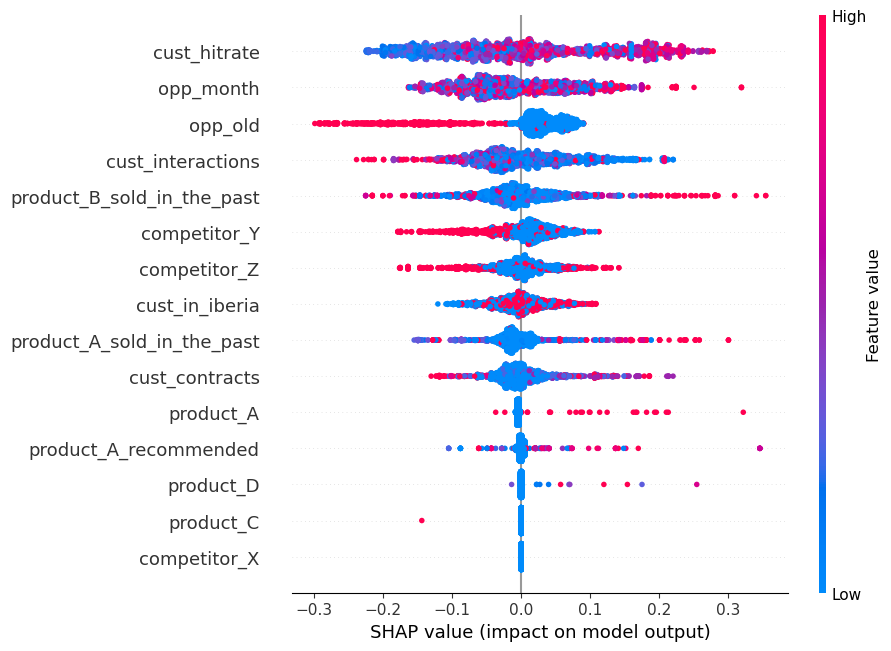

In [40]:
x_inter_train, x_inter_test, y_inter_train, y_inter_test = funcions_modelitzacio.split_variables_and_answer_with_fixed_attribute_value(1,16,"cust_interactions",0.9,0.7,"dataset.csv")
model_inter,inter_performance_score = funcions_modelitzacio.build_model(10,x_inter_train,y_inter_train,x_inter_test,y_inter_test)
inter_tree_explainer:funcions_explainability.shap.TreeExplainer = funcions_explainability.create_tree_model_explainer(model_inter,x_inter_train)
shap_values_inter:funcions_explainability.shap.Explanation = funcions_explainability.get_shap_values(inter_tree_explainer,x_inter_train)
funcions_explainability.plot_beeswarm(shap_values_inter)

Segons aquest gràfic, observem
- cust_hitrate ha de ser més gran per maximitzar les vendes
- una presència important del competidor Y afectaria negativament a les vendes
- tant per el producte_B_sold_in_the_past com pel producte_A_sold_in_the_past, com més s’hagin venut, repercutirà ,millor en les vendes